In [2]:
import math 
import copy 
import matplotlib.pyplot as plt
import numpy as np
import random

# Path Planning

Setting the 10x10 Environment as a List of Lists

In [5]:
env = [[0,0,0,0,0,0,0,0,0,0],
       [0,1,1,1,0,0,1,1,1,0],
       [0,1,0,0,0,0,0,0,1,0],
       [0,1,0,1,0,0,0,0,1,0],
       [0,0,0,1,0,0,1,0,0,0],
       [0,0,0,1,0,0,1,0,0,0],
       [0,1,0,0,0,0,1,0,1,0],
       [0,1,0,0,0,0,0,0,1,0],
       [0,1,1,1,0,0,1,1,1,0],
       [0,0,0,0,0,0,0,0,0,0]]

heuristic = [[19,18,17,16,15,14,13,12,11,10],
             [18,17,16,15,14,13,12,11,10,9],
             [17,16,15,14,13,12,11,10,9,8],
             [16,15,14,13,12,11,10,9,8,7],
             [15,14,13,12,11,10,9,8,7,6],
             [14,13,12,11,10,9,8,7,6,5],
             [13,12,11,10,9,8,7,6,5,4],
             [12,11,10,9,8,7,6,5,4,3],
             [11,10,9,8,7,6,5,4,3,2],
             [10,9,8,7,6,5,4,3,2,1]]

In [23]:
start = [4,0]
goal = [5,9]
cost = 1

In [24]:
delta = [[-1, 0],
         [0,-1],
         [1, 0],
         [0, 1]]

delta_name = ['^', '<', 'v', '>']

In [27]:
def AStar(environment, start, end, cost, heuristic):
    
    closed = [[0 for row in range(len(environment[0]))] for col in range(len(environment))]
    closed[start[0]][start[1]] = 1 #Starting Location 
    expand = [[-1 for row in range(len(environment[0]))] for col in range(len(environment))]
    dirs = [[ '' for row in range(len(environment[0]))] for col in range(len(environment))]
    
    x= start[0]
    y= start[1]
    g = 0
    h = heuristic[x][y]
    f = g+h
    
    open = [[f,g,h,x,y]]
    
    found = False 
    resign = False
    count = 0
    
    while found is False and resign is False:
        
        if len(open) == 0:
            resign = True
            print('Fail')
            
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            g = next[1]
            x = next[3]
            y = next[4]
            
            expand[x][y] = count
            count += 1
            
        if x == end[0] and y == end[1]:
            found = True
            
        else:
            for i in range(len(delta)):
                x2 = x+delta[i][0]
                y2 = y+delta[i][1]
                
                if x2 >= 0 and x2 < len(environment) and y2 >= 0 and y2 < len(environment):
                    if closed[x2][y2] == 0 and environment[x2][y2] == 0:
                        g2 = g + cost
                        h2 = heuristic[x2][y2]
                        f2 = g2+h2
                        open.append([f2, g2, h2, x2, y2])
                        closed[x2][y2] = 1
                        dirs[x2][y2] = i
                        
    policy = [['' for row in range(len(environment[0]))] for col in range(len(environment))]
    x = end[0]
    y = end[1]
    
    policy[x][y] = '*'
    while x!=start[0] or y!=start[1]:
        x2 = x-delta[dirs[x][y]][0]
        y2 = y-delta[dirs[x][y]][1]
        policy[x2][y2] = delta_name[dirs[x][y]]
        x = x2
        y = y2
        
    #for i in range(len(expand)):
        #print(expand[i])
        
    for i in range(len(policy)):
        print(policy[i])
        
    return next
        
            
print(AStar(env,start,goal,cost,heuristic))

['', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '']
['', '', '>', '>', '>', '>', '>', 'v', '', '']
['', '', '^', '', '', '', '', 'v', '', '']
['>', '>', '^', '', '', '', '', '>', '>', 'v']
['', '', '', '', '', '', '', '', '', '*']
['', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '']
[19, 14, 5, 5, 9]


# Path Smoothing

In [6]:
original_path = [[0, 0], [0, 1], [0, 2], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [5, 3], [5, 4], [5, 5]]
smooth_path = []

In [7]:
def Distance(c1, c2):
    return math.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

In [8]:
def Smooth(path, weight_path, weight_smooth, tolerance):

    smooth = copy.deepcopy(path)
    while True:
        for x in range(1, len(path)-1):
            for y in range(1, len(path[0])):
                line = weight_path*(path[x][y] - smooth[x][y])
                alpha = weight_smooth*(smooth[x-1][y] - smooth[x][y])
                beta = weight_smooth*(smooth[x+1][y] - smooth[x][y])
            
                smooth[x][y] = smooth[x][y] + line + alpha + beta

        if abs(Distance(path[1], smooth[1])) < tolerance:
            print("[MSG] Tolerance is Greater...")
            break

    #Plotting the lines against eachother
    plt.plot(smooth, label = "Smoothed Line")
    plt.plot(path, label = "Original Path")
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.legend()
    plt.show()

    print("Smooth Line: " + str(smooth))
    return smooth

[MSG] Tolerance is Greater...


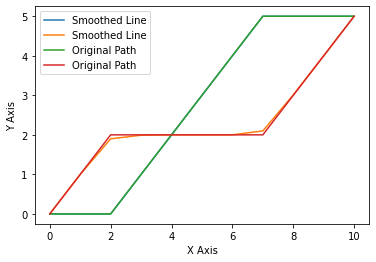

Smooth Line: [[0, 0], [0, 1.0], [0, 1.9], [1, 1.99], [2, 1.999], [3, 1.9999], [4, 1.99999], [5, 2.099999], [5, 3.0099999], [5, 4.0009999899999995], [5, 5]]


[[0, 0],
 [0, 1.0],
 [0, 1.9],
 [1, 1.99],
 [2, 1.999],
 [3, 1.9999],
 [4, 1.99999],
 [5, 2.099999],
 [5, 3.0099999],
 [5, 4.0009999899999995],
 [5, 5]]

In [9]:
Smooth(original_path, 0.5, 0.1, 0.000001)

The above line is inverted due to the MatplotLib plot, otherwise it is specified to be exactly as that in the report

# PID Control

In [9]:
class Robot(object):
    
    def __init__(self, length= 20.0):
        
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.length = length
        self.steering_noise = 0.0
        self.distance_noise = 0.0
        self.steering_drift = 0.0
        
    def set(self, x, y, orientation):
        
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)
        
    def noise(self, steering_noise, distance_noise):
        
        self.steering_noise = steering_noise
        self.distance_noise = distance_noise
        
    def set_steering_drift(self, drift):
        
        self.steering_drift = drift
        
    def move(self, steering, distance, tolerance = 0.001, maxangle = np.pi/4.0):
        
        if steering > maxangle:
            steering = maxangle
        if steering < -maxangle:
            steering = -maxangle
        if distance < 0.0:
            distance = 0.0
            
        #Applying Noise
        steeringnoise = random.gauss(steering, self.steering_noise)
        distancenoise = random.gauss(distance, self.distance_noise)
        
        #Steering Drift
        steeringnoise += self.steering_drift
        
        #Movement
        turn = np.tan(steeringnoise)*distancenoise / self.length
        
        if abs(turn) < tolerance:
            
            #Approximate via Straight Line Motion
            self.x += distancenoise * np.cos(self.orientation)
            self.y += distancenoise * np.sin(self.orientation)
            self.orientaion = (self.orientation + turn)%(2.0 * np.pi)
            
        else:
            
            #Approximate via Bicycle Model for Motion
            radius = distancenoise / turn
            turnx = self.x - (np.sin(self.orientation) * radius)
            turny = self.y + (np.cos(self.orientation) * radius)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
            self.x = turnx + (np.sin(self.orientation) * radius)
            self.y = turny - (np.cos(self.orientation) * radius)
            
    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)

In [14]:
robot = Robot()
robot.set(0,1,0)
robot.set_steering_drift(10)

In [15]:
def pid_control(robot, tau_p, tau_d, tau_i, n=100, speed = 1.0):
    
    x_trajec = []
    y_trajec = []
    
    prevcte = robot.y
    sum_cte = 0
    
    for _ in range(n):
        
        cte = robot.y
        cte_diff = cte-prevcte
        prevcte = cte
        sum_cte += cte
        
        steer = -tau_p * cte - tau_d * cte_diff - tau_i * sum_cte
        robot.move(steer, speed)
        
        x_trajec.append(robot.x)
        y_trajec.append(robot.y)
        
    return x_trajec, y_trajec

In [16]:
x_trajectory, y_trajectory = pid_control(robot, 0.2, 3.0, 0.004)
n = len(x_trajectory)

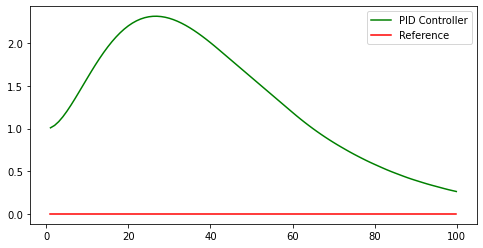

In [17]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(x_trajectory, y_trajectory, 'g', label = 'PID Controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label = 'Reference')
plt.legend()